# TensorFlow

참고 : TensorFlow Machine Learning Cookbook

In [1]:
import tensorflow as tf
sess = tf.Session()

C:\Users\GIGABYTE\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import numpy as np
import matplotlib.pyplot as plt

### 선형 회귀로 축소
> 선형 회귀 최적화에도 서포트 벡터 머신을 사용할 수 있다.
> 최대 마진 개념을 선형 회귀 최적화에 그래도 적용할 수 있다. 
> 분류 사이를 구분하는 마진을 최대화하는 대신, 가장 많은 (x,y) 점을 포함하게 마진을 최대화 한다.

In [3]:
# 데이터 로드
from sklearn import datasets
iris = datasets.load_iris()

x_vals = np.array([x[3] for x in iris.data])
y_vals = np.array([y[0] for y in iris.data])


# 데이터 분할
train_indices = np.random.choice(len(x_vals), round(len(x_vals)*0.8), replace=False)
test_indices = np.array(list(set(range(len(x_vals))) - set(train_indices)))

x_vals_train = x_vals[train_indices]
x_vals_test = x_vals[test_indices]
y_vals_train = y_vals[train_indices]
y_vals_test = y_vals[test_indices]


# 일괄 작업 크기 선언
batch_size = 50


# 플레이스홀더 및 변수 선언
x_data = tf.placeholder(shape=[None,1], dtype=tf.float32)
y_target = tf.placeholder(shape=[None,1], dtype=tf.float32)

A = tf.Variable(tf.random_normal(shape=[1,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))


# 선형 모델 생성
model_output = tf.add(tf.matmul(x_data, A), b)


# 비용 함수 선언
epsilon = tf.constant([0.5])
loss = tf.reduce_mean(tf.maximum(0., tf.subtract(tf.abs(tf.subtract(model_output, y_target)), epsilon)))


# 최적화 함수 생성
my_opt = tf.train.GradientDescentOptimizer(0.075)
train_step = my_opt.minimize(loss)


# 변수 초기화
init = tf.global_variables_initializer()
sess.run(init)


# 학습
train_loss = []
test_loss = []

for i in range(200):
    rand_index = np.random.choice(len(x_vals_train), size=batch_size)
    rand_x = np.transpose([x_vals_train[rand_index]])
    rand_y = np.transpose([y_vals_train[rand_index]])
    sess.run(train_step, feed_dict={x_data:rand_x, y_target:rand_y})
    
    temp_train_loss = sess.run(loss, feed_dict={x_data:np.transpose([x_vals_train]), y_target:np.transpose([y_vals_train])})
    train_loss.append(temp_train_loss)
    
    temp_test_loss = sess.run(loss, feed_dict={x_data:np.transpose([x_vals_test]), y_target:np.transpose([y_vals_test])})
    test_loss.append(temp_test_loss)
    
    if (i+1) % 50 == 0:
        print('-------' * 5)
        print('Generation : {}'.format(str(i+1)))
        print('A = {} , b = {}'.format(str(sess.run(A)), str(sess.run(b))))
        print('Train Loss = {}'.format(str(temp_train_loss)))
        print('Test Loss = {}'.format(str(temp_test_loss)))

-----------------------------------
Generation : 50
A = [[2.278633]] , b = [[2.5817409]]
Train Loss = 0.61779404
Test Loss = 0.6575619
-----------------------------------
Generation : 100
A = [[1.683433]] , b = [[3.577741]]
Train Loss = 0.26626378
Test Loss = 0.32205105
-----------------------------------
Generation : 150
A = [[1.331533]] , b = [[4.2557406]]
Train Loss = 0.11080063
Test Loss = 0.1603795
-----------------------------------
Generation : 200
A = [[1.1267828]] , b = [[4.4657397]]
Train Loss = 0.086844705
Test Loss = 0.1055491


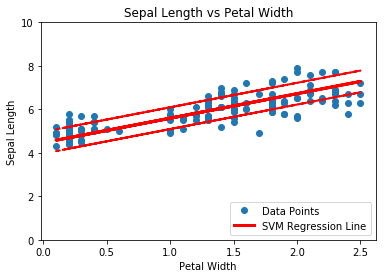

In [4]:
[[slope]] = sess.run(A)
[[y_intercept]] = sess.run(b)
[width] = sess.run(epsilon)

best_fit = []
best_fit_upper = []
best_fit_lower = []

for i in x_vals:
    best_fit.append(slope * i + y_intercept)
    best_fit_upper.append(slope * i + y_intercept + width)
    best_fit_lower.append(slope * i + y_intercept - width)
    
    
plt.plot(x_vals, y_vals, 'o', label='Data Points')
plt.plot(x_vals, best_fit, 'r-', label='SVM Regression Line', linewidth=3)
plt.plot(x_vals, best_fit_upper, 'r--', linewidth=2)
plt.plot(x_vals, best_fit_lower, 'r--', linewidth=2)
plt.ylim([0, 10])
plt.legend(loc='lower right')
plt.title('Sepal Length vs Petal Width')
plt.xlabel('Petal Width')
plt.ylabel('Sepal Length')
plt.show()

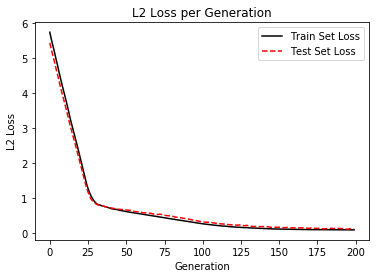

In [5]:
plt.plot(train_loss, 'k-', label='Train Set Loss')
plt.plot(test_loss, 'r--', label='Test Set Loss')
plt.title('L2 Loss per Generation')
plt.xlabel('Generation')
plt.ylabel('L2 Loss')
plt.legend(loc='upper right')
plt.show()